In [ ]:
#方法1 ドライブをマウントして、参照先一覧に追加
import sys
import os
from google.colab import drive

%cd /content/sample_data/
!git clone https://github.com/ScisciJP/scisciJP2024_tutorial.git

sys.path.append('/content/sample_data/scisciJP2024_tutorial')
print(os.getcwd())
os.chdir('/content/sample_data/scisciJP2024_tutorial')
sys.path

In [1]:
%pip install pyalex

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pyalex import Works
import pyalex
pyalex.config.email = "tarakomarecity@gmail.com"

flatten2 = lambda l: [item for sublist in l if sublist == sublist for item in sublist]

In [3]:
# コンセプトがbibliometricsである論文を取得
pager = Works().filter(concepts={"id": "C178315738"})\
            .select(["id", "title", "publication_year", "authorships", "referenced_works", "cited_by_count"]).paginate(per_page=200, n_max=None)

works_json = []
for page in pager:
    for item in page:
        works_json.append(item)
    print(len(works_json))


200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800
4000
4200
4400
4600
4800
5000
5200
5400
5600
5800
6000
6200
6400
6600
6800
7000
7200
7400
7600
7800
8000
8200
8400
8600
8800
9000
9200
9400
9600
9800
10000
10200
10400
10600
10800
11000
11200
11400
11600
11800
12000
12200
12400
12600
12800
13000
13200
13400
13600
13800
14000
14200
14400
14600
14800
15000
15200
15400
15600
15800
16000
16200
16400
16600
16800
17000
17200
17400
17600
17800
18000
18200
18400
18600
18800
19000
19200
19400
19600
19800
20000
20200
20400
20600
20800
21000
21200
21400
21600
21800
22000
22200
22400
22600
22800
23000
23200
23400
23600
23800
24000
24200
24400
24600
24800
25000
25200
25400
25600
25800
26000
26200
26400
26600
26800
27000
27200
27400
27600
27800
28000
28200
28400
28600
28800
29000
29025
29025


In [36]:
years = pd.Series(
    {work['id']: work['publication_year'] for work in works_json},
    name='year'
)
years.index.name = 'eid'

cited_counts = pd.Series(
    {work['id']: work['cited_by_count'] for work in works_json},
    name='cited_count'
)
cited_counts.index.name = 'eid'

ref_counts = pd.Series(
    {work['id']: len(work['referenced_works']) for work in works_json},
    name='ref_count'
)
ref_counts.index.name = 'eid'

citations_data = []
for work in works_json:
    target_id = work['id']
    for referenced_work in work['referenced_works']:
        citations_data.append({'source': referenced_work, 'target': target_id})
citations_df = pd.DataFrame(citations_data)

team_sizes = pd.Series(
    {work['id']: len(work['authorships']) for work in works_json},
    name='team_size'
)
team_sizes.index.name = 'eid'

display(years, cited_counts, ref_counts, citations_df, team_sizes)

eid
https://openalex.org/W2150220236    2009
https://openalex.org/W2755950973    2017
https://openalex.org/W2120109270    2007
https://openalex.org/W3160856016    2021
https://openalex.org/W3125707221    2014
                                    ... 
https://openalex.org/W4235401853    1993
https://openalex.org/W4254620949    1993
https://openalex.org/W4299678242    1993
https://openalex.org/W4366384354    1993
https://openalex.org/W768877643     1993
Name: year, Length: 29023, dtype: int64

eid
https://openalex.org/W2150220236    8276
https://openalex.org/W2755950973    4090
https://openalex.org/W2120109270    2681
https://openalex.org/W3160856016    2545
https://openalex.org/W3125707221    2428
                                    ... 
https://openalex.org/W4235401853       0
https://openalex.org/W4254620949       0
https://openalex.org/W4299678242       0
https://openalex.org/W4366384354       0
https://openalex.org/W768877643        0
Name: cited_count, Length: 29023, dtype: int64

eid
https://openalex.org/W2150220236     31
https://openalex.org/W2755950973     43
https://openalex.org/W2120109270      9
https://openalex.org/W3160856016     64
https://openalex.org/W3125707221    113
                                   ... 
https://openalex.org/W4235401853      0
https://openalex.org/W4254620949      0
https://openalex.org/W4299678242      0
https://openalex.org/W4366384354      0
https://openalex.org/W768877643       0
Name: ref_count, Length: 29023, dtype: int64

,source,target
0,https://openalex.org/W204885769,https://openalex.org/W2150220236
1,https://openalex.org/W1704958401,https://openalex.org/W2150220236
2,https://openalex.org/W1734878544,https://openalex.org/W2150220236
3,https://openalex.org/W1749485691,https://openalex.org/W2150220236
4,https://openalex.org/W1975409653,https://openalex.org/W2150220236
...,...,...
610253,https://openalex.org/W2109642998,https://openalex.org/W781373059
610254,https://openalex.org/W2149342699,https://openalex.org/W781373059
610255,https://openalex.org/W2508185776,https://openalex.org/W781373059
610256,https://openalex.org/W3133631291,https://openalex.org/W781373059


eid
https://openalex.org/W2150220236    2
https://openalex.org/W2755950973    2
https://openalex.org/W2120109270    4
https://openalex.org/W3160856016    5
https://openalex.org/W3125707221    2
                                   ..
https://openalex.org/W4235401853    0
https://openalex.org/W4254620949    0
https://openalex.org/W4299678242    2
https://openalex.org/W4366384354    2
https://openalex.org/W768877643     1
Name: team_size, Length: 29023, dtype: int64

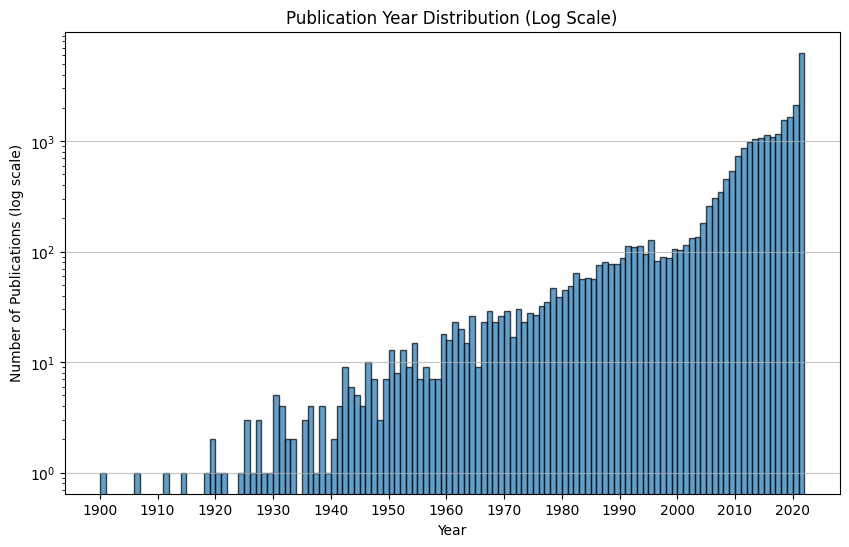

In [34]:
# yearsのヒストグラムの作成
plt.figure(figsize=(10, 6))
plt.hist(years, bins=range(1900, 2023), edgecolor='black', alpha=0.7, log=True)
plt.title("Publication Year Distribution (Log Scale)")
plt.xlabel("Year")
plt.ylabel("Number of Publications (log scale)")
plt.xticks(range(1900, 2023, 10))
plt.grid(axis='y', alpha=0.75)

# ヒストグラムの表示
plt.show()

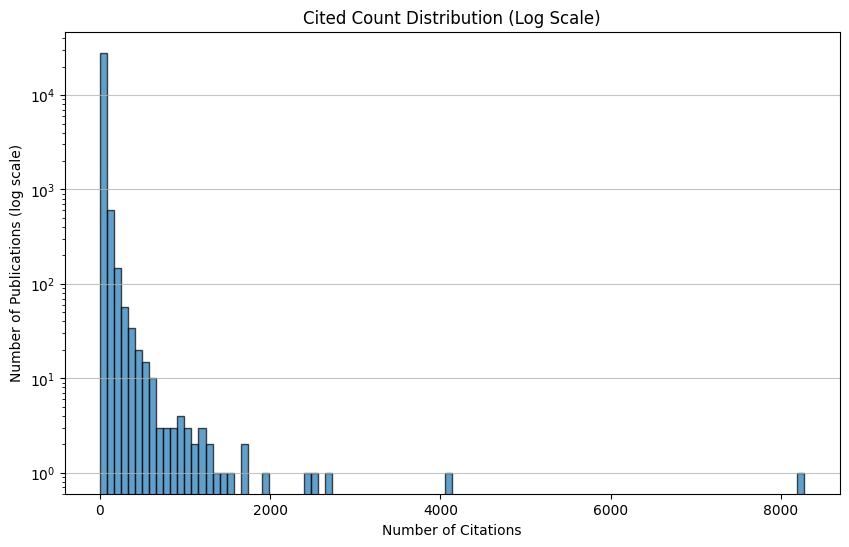

In [38]:
# cited_countsのヒストグラムの作成
plt.figure(figsize=(10, 6))
plt.hist(cited_counts, bins=100, edgecolor='black', alpha=0.7, log=True)
plt.title("Cited Count Distribution (Log Scale)")
plt.xlabel("Number of Citations")
plt.ylabel("Number of Publications (log scale)")
plt.grid(axis='y', alpha=0.75)

# ヒストグラムの表示
plt.show()

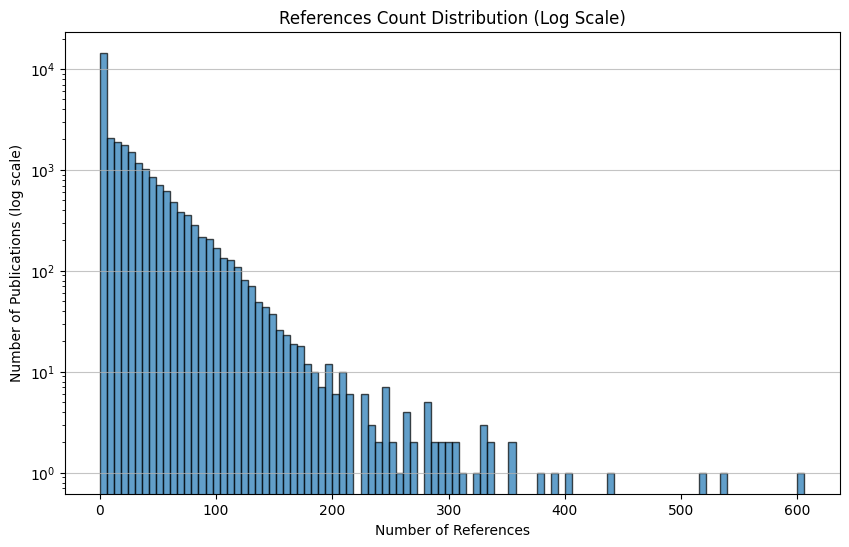

In [39]:
# ref_countsのヒストグラムの作成
plt.figure(figsize=(10, 6))
plt.hist(ref_counts, bins=100, edgecolor='black', alpha=0.7, log=True)
plt.title("References Count Distribution (Log Scale)")
plt.xlabel("Number of References")
plt.ylabel("Number of Publications (log scale)")
plt.grid(axis='y', alpha=0.75)

# ヒストグラムの表示
plt.show()

In [6]:
def citation_groupby(df_citation):
    '''source,targetのDataFrameを引用先，引用元ごとにgroupby
    
    input: source,targetをcolumnにもつedgeのDataFrame

    index: eid
    source: indexが引用先となる論文群(新)
    target: indexが引用元となる論文群(旧)
    '''
    
    citations_source_gp = df_citation.groupby('source').agg(list)
    citations_target_gp = df_citation.groupby('target').agg(list)
    df_citation_gp = pd.concat([citations_source_gp,citations_target_gp],axis = 1)
    return df_citation_gp

citations_gb = citation_groupby(citations_df)
citations_gb

,target,source
https://openalex.org/W1000251227,[https://openalex.org/W4390689774],NaN
https://openalex.org/W100042037,[https://openalex.org/W2337942251],NaN
https://openalex.org/W1000865391,[https://openalex.org/W4313485031],NaN
https://openalex.org/W1001311347,[https://openalex.org/W4316041942],NaN
https://openalex.org/W1001370459,"[https://openalex.org/W3093949161, https://ope...",NaN
...,...,...
https://openalex.org/W94657974,NaN,[https://openalex.org/W649219009]
https://openalex.org/W966396339,NaN,"[https://openalex.org/W89953681, https://opena..."
https://openalex.org/W99135314,NaN,[https://openalex.org/W1715570370]
https://openalex.org/W99906937,NaN,"[https://openalex.org/W2093450157, https://ope..."


In [7]:
citations_gb['year'] = citations_gb.index.map(years)
citations_gb

,target,source,year
https://openalex.org/W1000251227,[https://openalex.org/W4390689774],NaN,NaN
https://openalex.org/W100042037,[https://openalex.org/W2337942251],NaN,NaN
https://openalex.org/W1000865391,[https://openalex.org/W4313485031],NaN,NaN
https://openalex.org/W1001311347,[https://openalex.org/W4316041942],NaN,NaN
https://openalex.org/W1001370459,"[https://openalex.org/W3093949161, https://ope...",NaN,NaN
...,...,...,...
https://openalex.org/W94657974,NaN,[https://openalex.org/W649219009],2000.0
https://openalex.org/W966396339,NaN,"[https://openalex.org/W89953681, https://opena...",1993.0
https://openalex.org/W99135314,NaN,[https://openalex.org/W1715570370],1981.0
https://openalex.org/W99906937,NaN,"[https://openalex.org/W2093450157, https://ope...",2013.0


In [8]:
def get_score(node):
    try:
        node_r = set(citations_gb.target.loc[node])
        node_r_c = set(flatten2([citations_gb.source.loc[x] for x in node_r])) - set([node])
        node_c = set(citations_gb.source.loc[node])
        allnodes = node_c | node_r_c
        cite_target = node_c - node_r_c
        cite_targetref = node_r_c - node_c
        cite_target_targetref_both = node_r_c & node_c
        score = (len(cite_target)*1 + len(cite_target_targetref_both)*-1 + len(cite_targetref)*0)/len(allnodes)
        return score
    except:
        return None

In [10]:
eids = citations_gb.index

res = []
for eid in eids:
    res.append(get_score(eid))
scores = pd.DataFrame([[eid,re] for eid,re in zip(eids,res)])

scores.index = scores[0]
scores['team_size'] = scores[0].map(team_sizes)
display(scores)

,0,1
0,https://openalex.org/W1000251227,NaN
1,https://openalex.org/W100042037,NaN
2,https://openalex.org/W1000865391,NaN
3,https://openalex.org/W1001311347,NaN
4,https://openalex.org/W1001370459,NaN
...,...,...
372082,https://openalex.org/W94657974,NaN
372083,https://openalex.org/W966396339,NaN
372084,https://openalex.org/W99135314,NaN
372085,https://openalex.org/W99906937,NaN


,0,1
48,https://openalex.org/W100955773,0.025210
57,https://openalex.org/W1011306238,0.494624
98,https://openalex.org/W1021000864,-0.000690
130,https://openalex.org/W102840971,0.117391
144,https://openalex.org/W1030557811,0.125000
...,...,...
363936,https://openalex.org/W976301956,0.005085
363937,https://openalex.org/W97639618,0.311475
363940,https://openalex.org/W976782350,-0.007576
363962,https://openalex.org/W98094315,0.034483


,0,1,team_size
0,,,
https://openalex.org/W1000251227,https://openalex.org/W1000251227,NaN,NaN
https://openalex.org/W100042037,https://openalex.org/W100042037,NaN,NaN
https://openalex.org/W1000865391,https://openalex.org/W1000865391,NaN,NaN
https://openalex.org/W1001311347,https://openalex.org/W1001311347,NaN,NaN
https://openalex.org/W1001370459,https://openalex.org/W1001370459,NaN,NaN
...,...,...,...
https://openalex.org/W94657974,https://openalex.org/W94657974,NaN,2.0
https://openalex.org/W966396339,https://openalex.org/W966396339,NaN,1.0
https://openalex.org/W99135314,https://openalex.org/W99135314,NaN,1.0


In [11]:
scores_notna = scores[scores[1].notna() & scores['team_size'].notna()].drop(columns=0)
scores_notna

,1,team_size
0,,
https://openalex.org/W100955773,0.025210,2.0
https://openalex.org/W1011306238,0.494624,3.0
https://openalex.org/W1021000864,-0.000690,2.0
https://openalex.org/W102840971,0.117391,2.0
https://openalex.org/W1030557811,0.125000,1.0
...,...,...
https://openalex.org/W976301956,0.005085,5.0
https://openalex.org/W97639618,0.311475,2.0
https://openalex.org/W976782350,-0.007576,2.0


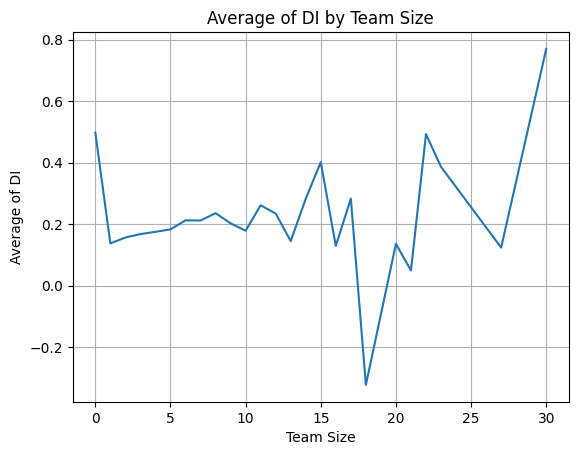

In [12]:
# team_sizeごとにグループ化
grouped_df = scores_notna.groupby('team_size').mean()

# グラフの描画
plt.plot(grouped_df.index, grouped_df[1])
plt.xlabel('Team Size')
plt.ylabel('Average of DI')
plt.title('Average of DI by Team Size')
plt.grid(True)
plt.show()

In [41]:
scores_notna['year'] = years
scores_notna['cited_count'] = cited_counts
scores_notna['ref_count'] = ref_counts
scores_notna

,1,team_size,year,cited_count,ref_count
0,,,,,
https://openalex.org/W100955773,0.025210,2.0,2007,12,3
https://openalex.org/W1011306238,0.494624,3.0,2012,3,52
https://openalex.org/W1021000864,-0.000690,2.0,2015,1214,35
https://openalex.org/W102840971,0.117391,2.0,2009,14,35
https://openalex.org/W1030557811,0.125000,1.0,1999,8,3
...,...,...,...,...,...
https://openalex.org/W976301956,0.005085,5.0,2015,55,26
https://openalex.org/W97639618,0.311475,2.0,2013,5,19
https://openalex.org/W976782350,-0.007576,2.0,2015,4,1


In [45]:
scores_filtered = scores_notna[(scores_notna['year'] < 2018) & (scores_notna['cited_count'] > 10) & (scores_notna['ref_count'] > 10)]
scores_filtered

,1,team_size,year,cited_count,ref_count
0,,,,,
https://openalex.org/W1021000864,-0.000690,2.0,2015,1214,35
https://openalex.org/W102840971,0.117391,2.0,2009,14,35
https://openalex.org/W1043101226,0.317797,2.0,2015,108,79
https://openalex.org/W1045629360,0.084615,2.0,2015,11,11
https://openalex.org/W1123106775,0.010526,4.0,2015,25,23
...,...,...,...,...,...
https://openalex.org/W925886233,0.008942,3.0,2015,32,24
https://openalex.org/W93400381,0.488372,2.0,2005,12,23
https://openalex.org/W943972918,0.471910,4.0,2015,32,42


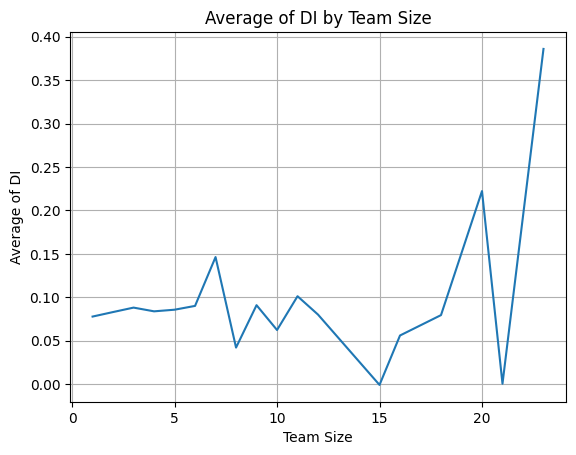

In [46]:
# team_sizeごとにグループ化
grouped_df = scores_filtered.groupby('team_size').mean()

# グラフの描画
plt.plot(grouped_df.index, grouped_df[1])
plt.xlabel('Team Size')
plt.ylabel('Average of DI')
plt.title('Average of DI by Team Size')
plt.grid(True)
plt.show()